# Logistic Regression Exercises

**Imports**

In [81]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import acquire
from prepare import prep_titanic_data
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Acquire & Prepare**

In [82]:
# Acquire Step
df = acquire.get_titanic_data()
# prepare the data
train, validate, test = prep_titanic_data(df)

# drop object columns and create X_train of features only 
# and y_train of survived only. 
X_train = train.drop(columns=['survived','sex','embark_town'])
y_train = train.survived

X_validate = validate.drop(columns=['survived','sex', 'embark_town'])
y_validate = validate.survived

X_test = test.drop(columns=['survived','sex', 'embark_town'])
y_test = test.survived

# check the shape
X_train.shape, X_validate.shape, X_test.shape

((498, 9), (214, 9), (179, 9))

**Explore**

* Think back to your Explore lesson and ask questions you want to know about the data
* Make decisions on which varaibles to keep and which to discard
* Accomplish feature engineering to provide the model with new variables

**Model**

0. Baseline (mode of the target for classification problems)
1. Create Algorithm Object
2. Create Model by fitting algorithm to X_train, y_train
3. Run Model by predicting using X_train
4. Evaluate Model by comparing y_train_pred with y_train (actual values)
5. Run Model by predicting using X_validate
6. Evaluate Model by comparing y_validate_pred with y_validate (actual values)

**Baseline**

In [83]:
# write a function to compute the baseline for a classification model
def establish_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_prediction = y_train.mode()

    # create a series of predictions with that value, 
    # the same length as our training set
    y_train_pred = pd.Series([0]*len(y_train))

    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

In [84]:
baseline_accuracy = establish_baseline(y_train)

In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

### Question 1

Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [85]:
# create algorithm object
logit1 = LogisticRegression(C=1, 
                           random_state=123, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# fit model with age, pclass and fare as only features
logit1.fit(X_train[['age', 'pclass', 'fare']], y_train)

# compute accuracy
train_accuracy = logit1.score(X_train[['age', 'pclass', 'fare']], 
                             y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.6947791164658634
Baseline Accuracy: 0.6164658634538153


The model performs better than baseline with age, pclass and fare as the only features, when using the default hyperparameters. 

### Question 2

Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [86]:
# create algorithm object
logit2 = LogisticRegression(C=1,
                           random_state=123, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# fit model with age, pclass, fare and sex_male as only features
logit2.fit(X_train[['age', 'pclass', 'fare', 'sex_male']], 
          y_train)

# compute accuracy
train_accuracy = logit2.score(X_train[['age', 'pclass', 'fare', 'sex_male']], 
                             y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.7971887550200804
Baseline Accuracy: 0.6164658634538153


### Question 3

Try out other combinations of features and models.

In [87]:
# create algorithm object
logit3 = LogisticRegression(C=1, 
                           random_state=123, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# fit model with all features
logit3.fit(X_train, y_train)

# compute accuracy
train_accuracy = logit3.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8072289156626506
Baseline Accuracy: 0.6164658634538153


For the next few models, we will use all the same features as in the 3rd model, but we will adjust the hyperparameters. 

First, change the solver to 'lbfgs'. 

In [88]:
# create algorithm object
logit4 = LogisticRegression(C=1, 
                           random_state=123, 
                           intercept_scaling=1, 
                           solver='lbfgs'
                          )

# fit model with all features
logit4.fit(X_train, y_train)

# compute accuracy
train_acc4 = logit4.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_acc4}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8192771084337349
Baseline Accuracy: 0.6164658634538153


Next, change the class_weight to 'balanced'

In [89]:
# create algorithm object
logit5 = LogisticRegression(C=1,
                            class_weight='balanced',
                            random_state=123, 
                            intercept_scaling=1, 
                            solver='lbfgs'
                           )

# fit model with all features
logit5.fit(X_train, y_train)

# compute accuracy
train_acc5 = logit5.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_acc5}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8072289156626506
Baseline Accuracy: 0.6164658634538153


That reduced performance slightly. So I will revert back to the default of 'None'. 
Now, I will try adjusting the C value. 

In [90]:
# create algorithm object
logit6 = LogisticRegression(C=0.1,
                            random_state=123, 
                            intercept_scaling=1, 
                            solver='lbfgs'
                           )

# fit model with all features
logit6.fit(X_train, y_train)

# compute accuracy
train_acc6 = logit6.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_acc6}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8273092369477911
Baseline Accuracy: 0.6164658634538153


Changing my C value to be closer to 0, meaning I'm increasing the regularization strength. 

My 3 best models are currently: logit4, logit5, logit6

### Question 4

Use your best 3 models to predict and evaluate on your validate sample.

In [91]:
# use logit4 to make predictions for the X_validate observations
y_val_pred4 = logit4.predict(X_validate)
# compute accuracy
val_acc4 = logit4.score(X_validate, y_validate)
# create a list of model_number, training accuracy, validate accuracy
# to add to a dataframe at the end comparing all the models. 
model4 = [4, train_acc4, val_acc4]

# use logit5 to make predictions for the X_validate observations
y_val_pred5 = logit5.predict(X_validate)
# compute accuracy
val_acc5 = logit5.score(X_validate, y_validate)
# create a list of model_number, training accuracy, validate accuracy
# to add to a dataframe at the end comparing all the models. 
model5 = [5, train_acc5, val_acc5]

# use logit6 to make predictions for the X_validate observations
y_val_pred6 = logit6.predict(X_validate)
# compute accuracy
val_acc6 = logit6.score(X_validate, y_validate)
# create a list of model_number, training accuracy, validate accuracy
# to add to a dataframe at the end comparing all the models. 
model6 = [6, train_acc6, val_acc6]

pd.DataFrame([model4, model5, model6], columns=['model', 
                                                'in-sample accuracy',
                                                'out-of-sample accuracy'
                                               ])


,model,in-sample accuracy,out-of-sample accuracy
0,4,0.819277,0.775701
1,5,0.807229,0.771028
2,6,0.827309,0.789720


The best model of these is model 6, which has the highest accuracy in both training and validate, and a minimal difference between the two. 

### Question 5

Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [92]:
# use logit6 to make predictions for the X_validate observations
y_test_pred = logit6.predict(X_test)
# compute accuracy
test_acc = logit6.score(X_test, y_test)

test_acc

0.8044692737430168

Feature Importance

In [94]:
print('Coefficient: \n', logit6.coef_)
print('Intercept: \n', logit6.intercept_)

Coefficient: 
 [[-8.13986730e-01 -2.69531283e-02 -3.35788586e-01 -1.51096212e-02
   1.08585214e-03 -3.63943367e-01 -1.78010962e+00  3.18878593e-01
  -1.28262363e-01]]
Intercept: 
 [3.67451859]


Estimate Probability

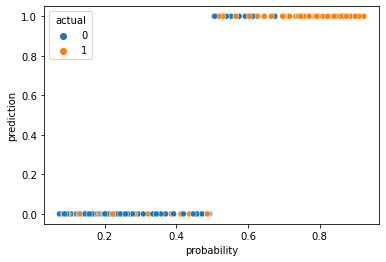

In [96]:
# Create an array of probabilities of surviving

y_pred_proba = logit6.predict_proba(X_test)
# select the 2nd item in the array to get prob of survival (1)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

test_results = pd.DataFrame({'probability': y_pred_proba, 
                             'prediction': y_test_pred,
                             'actual': y_test})

sns.scatterplot(x='probability', y='prediction', 
                data=test_results, 
                hue='actual'
               )
plt.show()

Accuracy is slightly higher on test than on validate, and it is slightly lower on test than train. 